In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
x = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [33]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [34]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=4)

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [56]:
y_pred = knn.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [59]:
acc = accuracy_score(y_test,y_pred)
acc

0.7604166666666666

In [60]:
recall = recall_score(y_test,y_pred)
recall

0.3898305084745763

In [62]:
precision = precision_score(y_test,y_pred)
precision

0.696969696969697

In [63]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[123,  10],
       [ 36,  23]])

In [64]:
err = (1 - acc)
err

0.23958333333333337

In [65]:
err_1 = (cm[0,1] + cm[1,0])/(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) # Error Rate = FP+FN/TP+TN+FP+FN
err_1

0.23958333333333334

In [69]:
def knn(x_train, y_train, x_test, y_test, n):
    n_range = range(1,n)
    results=[]
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train,y_train)
        predict_y = knn.predict(x_test)
        accuracy = accuracy_score(y_test,predict_y)
        results.append(accuracy)
    return results

In [70]:
import matplotlib.pyplot as plt

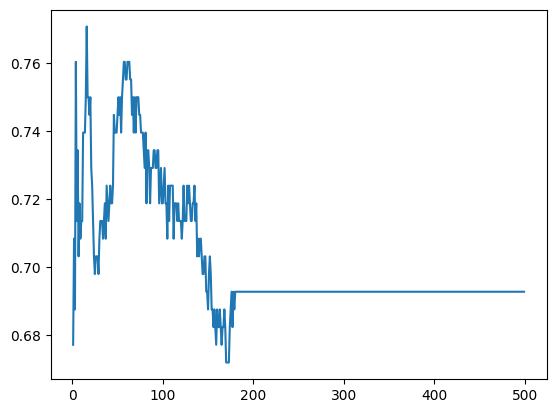

In [71]:
n = 500
output = knn(x_train,y_train,x_test,y_test,n)
n_range = range(1,n)
plt.plot(n_range, output)